<a href="https://colab.research.google.com/github/aschoudry/ConstraintOnGWwaveform/blob/master/CNN_pycbc_cwt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import numpy as np
from tensorflow.keras import layers

In [2]:
model = keras.Sequential([layers.Conv2D(32, kernel_size=3, activation='relu', input_shape = (256,256, 3)), 
                          layers.MaxPool2D((3,3)), 
                          layers.Conv2D(64, kernel_size=3, activation='relu'), 
                          layers.MaxPool2D((3,3)), layers.Flatten(), 
                          layers.Dense(units=1)])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 82, 82, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 46656)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 46657     
Total params: 66,049
Trainable params: 66,049
Non-trainable params: 0
____________________________________________________

In [4]:
model.compile(optimizer='Adam', loss='mse')

In [5]:
def process_path(file_path):
  label = tf.strings.split(file_path, '_')[-2]
  label = tf.strings.to_number(label)
  image = tf.io.decode_png(tf.io.read_file(file_path))
  image = tf.cast(image, tf.float32)
  image/=255
  return image, label

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
list_ds_train = tf.data.Dataset.list_files('/content/gdrive/MyDrive/pycbc_image_data/train_m_*_.png', shuffle=True)
labeled_ds_train = list_ds_train.map(process_path)
labeled_ds_train = labeled_ds_train.batch(20)

In [8]:
list_ds_test = tf.data.Dataset.list_files('/content/gdrive/MyDrive/pycbc_image_data/test_m_*_.png', shuffle=True)
labeled_ds_test = list_ds_test.map(process_path)
labeled_ds_test = labeled_ds_test.batch(20)

In [9]:
history = model.fit(labeled_ds_train, epochs=30, verbose=2, validation_data=labeled_ds_test)

Epoch 1/30
50/50 - 51s - loss: 1183.6359 - val_loss: 59.7686
Epoch 2/30
50/50 - 51s - loss: 15.5359 - val_loss: 3.1212
Epoch 3/30
50/50 - 52s - loss: 1.9972 - val_loss: 0.7500
Epoch 4/30
50/50 - 51s - loss: 1.0094 - val_loss: 0.5050
Epoch 5/30
50/50 - 51s - loss: 0.6865 - val_loss: 0.4263
Epoch 6/30
50/50 - 51s - loss: 0.5954 - val_loss: 0.3257
Epoch 7/30
50/50 - 50s - loss: 0.4343 - val_loss: 0.3440
Epoch 8/30
50/50 - 50s - loss: 0.4223 - val_loss: 0.6754
Epoch 9/30
50/50 - 50s - loss: 0.4148 - val_loss: 0.4666
Epoch 10/30
50/50 - 49s - loss: 0.3353 - val_loss: 0.2105
Epoch 11/30
50/50 - 49s - loss: 0.2910 - val_loss: 0.2312
Epoch 12/30
50/50 - 49s - loss: 0.2531 - val_loss: 0.1601
Epoch 13/30
50/50 - 50s - loss: 0.2230 - val_loss: 0.1567
Epoch 14/30
50/50 - 50s - loss: 0.2610 - val_loss: 0.1709
Epoch 15/30
50/50 - 50s - loss: 0.2079 - val_loss: 0.1208
Epoch 16/30
50/50 - 50s - loss: 0.1910 - val_loss: 0.2791
Epoch 17/30
50/50 - 49s - loss: 0.1634 - val_loss: 0.1052
Epoch 18/30
50/50 

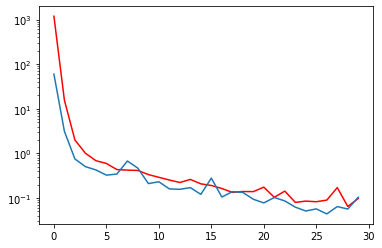

In [10]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'])
plt.yscale("log")